# Artificial Neural Network (ANN) for Student Performance Prediction

## Objective
In this notebook, we train an Artificial Neural Network (ANN) to predict a student's
future performance based on study behavior and learning patterns.

ANNs are suitable for capturing non-linear relationships between features such as
study hours, attention span, revision frequency, and fatigue level.


## Import Required Libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

## Load Preprocessed Dataset
We use the cleaned and encoded dataset saved during preprocessing.


In [2]:
df = pd.read_csv("../data/processed/processed_student_data.csv")
df.head()

,student_id,subject,hours_studied_per_day,days_before_exam,revision_count,topic_difficulty,mock_test_score,attendance_percentage,predicted_performance
0,1,0,5.7,34,2,1,39,85,2
1,2,2,2.3,28,0,0,94,87,0
2,3,1,3.5,31,3,0,51,61,0
3,4,2,3.6,8,1,0,79,65,0
4,5,2,5.9,39,1,2,43,68,2


## Feature and Target Separation


In [3]:
X = df.drop(["student_id", "predicted_performance"], axis=1)
y = df["predicted_performance"]

## Train-Test Split


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Feature Scaling
ANNs perform better when numerical features are scaled.


In [5]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## ANN Architecture
- Input Layer: Number of features
- Hidden Layers: 2 Dense layers with ReLU activation
- Output Layer: Binary classification using Sigmoid

In [6]:
model = Sequential()

model.add(Dense(32, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()

C:\Users\Atharv\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 801 (3.13 KB)

 Trainable params: 801 (3.13 KB)

 Non-trainable params: 0 (0.00 B)

## Model Training
Early stopping is used to prevent overfitting.


In [7]:
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.2604 - loss: 0.7646 - val_accuracy: 0.2500 - val_loss: 0.7081
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2448 - loss: 0.7362 - val_accuracy: 0.2292 - val_loss: 0.6878
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2083 - loss: 0.7069 - val_accuracy: 0.2083 - val_loss: 0.6707
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1927 - loss: 0.6827 - val_accuracy: 0.2083 - val_loss: 0.6542
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1927 - loss: 0.6585 - val_accuracy: 0.2083 - val_loss: 0.6388
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2083 - loss: 0.6352 - val_accuracy: 0.1875 - val_loss: 0.6235
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1823 - loss: 0.6119 - val_accuracy: 0.1875 - val_loss: 0.6078
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1823 - loss: 0.5842 - val_accuracy: 0.1875 - val_loss: 0.5902


## Training & Validation Accuracy


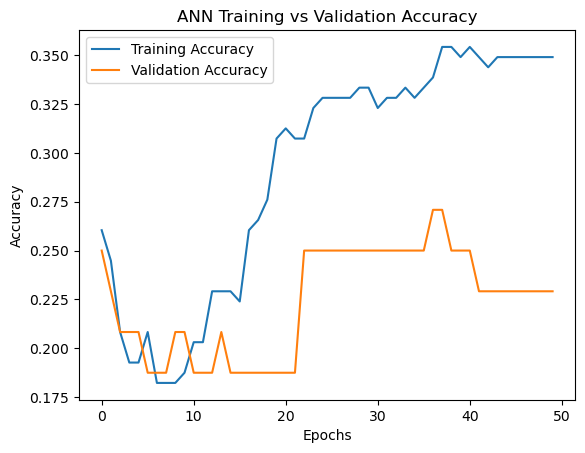

In [8]:
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("ANN Training vs Validation Accuracy")
plt.legend()
plt.show()

## Model Evaluation on Test Data


In [9]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
print("ANN Model Accuracy:", accuracy)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
ANN Model Accuracy: 0.3333333333333333


## ANN Model Evaluation & Observations

### Training vs Validation Performance
From the accuracy plot, we observe that:
- Training accuracy remains relatively low and fluctuates around ~33%
- Validation accuracy drops sharply in early epochs and stabilizes at a very low level (~20–25%)
- The gap between training and validation accuracy indicates that the ANN is **not generalizing well**

This suggests that the current ANN architecture and/or dataset is not sufficient for learning strong patterns.

---

### Test Accuracy
- **ANN Test Accuracy:** ~33%

This accuracy is only slightly better than random guessing for a multi-class problem, indicating weak predictive performance.


## Confusion Matrix

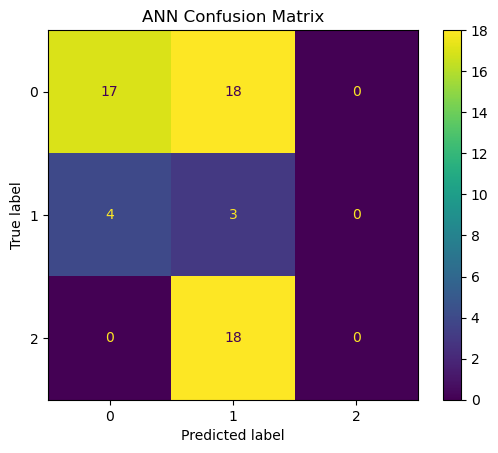

In [10]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("ANN Confusion Matrix")
plt.show()

Key observations:
- The model heavily predicts the **middle class**, misclassifying many samples
- The third class is **never predicted**, showing severe class bias
- Poor recall and precision for minority classes
- Indicates class imbalance and insufficient feature learning

---

### Key Reasons for Poor ANN Performance
- Limited dataset size
- Class imbalance in target variable
- ANN architecture too simple for multi-class separation
- Possible loss of information during preprocessing
- ANN generally requires **larger datasets** compared to traditional ML models

---

### Conclusion
Although Artificial Neural Networks are powerful, in this project the ANN:
- Did not outperform classical ML models
- Struggled with class separation
- Highlighted the importance of dataset quality and balance

For this problem, **tree-based models or ensemble methods** are more suitable.  
The ANN experiment still adds value by demonstrating comparative model analysis and design decisions.
